In [1]:
import pickle
import diptest
import numpy as np
import matplotlib.pyplot as plt

from utils import load_data
from utils import normalization, renormalization
from utils import introduce_missing_data

from sklearn.utils import shuffle
from scipy.stats import spearmanr

from knnxkde import KNNxKDE

## Appendix A -- Qualitative evaluation of the hyperparameters

### Appendix A.1. Softmax temperature $\tau$

In [7]:
original_data = load_data('2d_sine')
original_data = shuffle(original_data)

miss_data = introduce_missing_data(
    original_data=original_data,
    miss_rate=0.2,
    mode='full_mcar',
    data_name='2d_sine',
)

norm_miss_data, norm_params = normalization(miss_data)
norm_original_data, _ = normalization(original_data, parameters=norm_params)

In [9]:
MY_LIST_TAUS = [10.0, 500.0, 25000.0]

knnxkde_tau1 = KNNxKDE(h=0.03, tau=1.0/MY_LIST_TAUS[0], metric='nan_std_eucl')
norm_imputed_samples_tau1 = knnxkde_tau1.impute_samples(norm_miss_data, nb_draws=10000)

knnxkde_tau2 = KNNxKDE(h=0.03, tau=1.0/MY_LIST_TAUS[1], metric='nan_std_eucl')
norm_imputed_samples_tau2 = knnxkde_tau2.impute_samples(norm_miss_data, nb_draws=10000)

knnxkde_tau3 = KNNxKDE(h=0.03, tau=1.0/MY_LIST_TAUS[2], metric='nan_std_eucl')
norm_imputed_samples_tau3 = knnxkde_tau3.impute_samples(norm_miss_data, nb_draws=10000)

rand_key = (263, 0) and data is [7.502308  1.0325327]


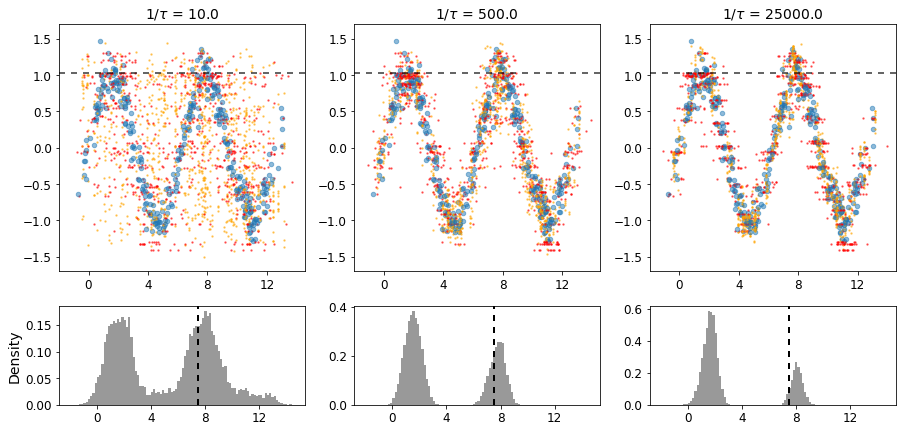

In [14]:
Nss = 10  # nb sub-samples for plotting purposes
rand_key = (0, 1)
while rand_key[1]==1:
    rand_idx = np.random.choice(len(norm_imputed_samples_tau1.keys()))
    rand_key = list(norm_imputed_samples_tau1.keys())[rand_idx]  # fixed random cell for all histograms
print(f'rand_key = {rand_key} and data is {original_data[rand_key[0]]}')

fig, ax = plt.subplots(2, 3, figsize=(15, 7), gridspec_kw={'height_ratios': [5, 2]})
for i0 in range(3):
    if i0==0:
        temp_sample_dict = norm_imputed_samples_tau1
    elif i0==1:
        temp_sample_dict = norm_imputed_samples_tau2
    elif i0==2:
        temp_sample_dict = norm_imputed_samples_tau3
    
    for i1 in range(original_data.shape[0]):
        if np.isnan(miss_data[i1, 0]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 0)], size=Nss, replace=False)
            m1 = norm_params['min_val'][0]
            m2 = norm_params['max_val'][0]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            y_scatter = [miss_data[i1, 1]] * Nss
            ax[0, i0].scatter(cur_sample, y_scatter, c='red', s=2.0, alpha=0.5)
        elif np.isnan(miss_data[i1, 1]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 1)], size=Nss, replace=False)
            m1 = norm_params['min_val'][1]
            m2 = norm_params['max_val'][1]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            x_scatter = [miss_data[i1, 0]] * Nss
            ax[0, i0].scatter(x_scatter, cur_sample, c='orange', s=2.0, alpha=0.5)
        else:
            x_scatter = miss_data[i1, 0]
            y_scatter = miss_data[i1, 1]
            ax[0, i0].scatter(x_scatter, y_scatter, c='C0', s=20.0, alpha=0.5)
    
    ax[0, i0].axhline(miss_data[rand_key[0], 1], ls=(0, (3, 3)), c='black', lw=2, alpha=0.6)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[0, i0].set_ylim(-1.7, 1.7)
    ax[0, i0].set_title(fr'$1 / \tau$ = {MY_LIST_TAUS[i0]}', size=14)
    ax[0, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[0, i0].tick_params(labelsize=12)
    
    if rand_key[1]==0:
        m1 = norm_params['min_val'][0]
        m2 = norm_params['max_val'][0]
    elif rand_key[1]==1:
        m1 = norm_params['min_val'][1]
        m2 = norm_params['max_val'][1]
    
    cur_sample = temp_sample_dict[rand_key] * (m2 + 1e-6) + m1
    ax[1, i0].hist(cur_sample, bins=100, range=[-2.0, 4.0*np.pi+2.0], color='black', alpha=0.4, density=True)
    ax[1, i0].axvline(original_data[rand_key[0], 0], ls=(0, (3, 3)), c='black', lw=2)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[1, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[1, i0].tick_params(labelsize=12)

ax[1, 0].set_ylabel('Density', size=14)
plt.savefig('figures/appA_tau.pdf')
plt.show()

### Appendix A.2. Gaussian Kernel bandwidth $h$

In [11]:
original_data = load_data('dataset2')
original_data = shuffle(original_data)

miss_data = introduce_missing_data(
    original_data=original_data,
    miss_rate=0.2,
    mode='full_mcar',
    data_name='dataset2',
)

norm_miss_data, norm_params = normalization(miss_data)
norm_original_data, _ = normalization(original_data, parameters=norm_params)

In [12]:
MY_LIST_HS = [0.01, 0.03, 0.10]

knnxkde_h1 = KNNxKDE(h=MY_LIST_HS[0], tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_h1 = knnxkde_h1.impute_samples(norm_miss_data, nb_draws=10000)

knnxkde_h2 = KNNxKDE(h=MY_LIST_HS[1], tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_h2 = knnxkde_h2.impute_samples(norm_miss_data, nb_draws=10000)

knnxkde_h3 = KNNxKDE(h=MY_LIST_HS[2], tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_h3 = knnxkde_h3.impute_samples(norm_miss_data, nb_draws=10000)

rand_key = (304, 0) and data is [2.8786721  0.34176636]


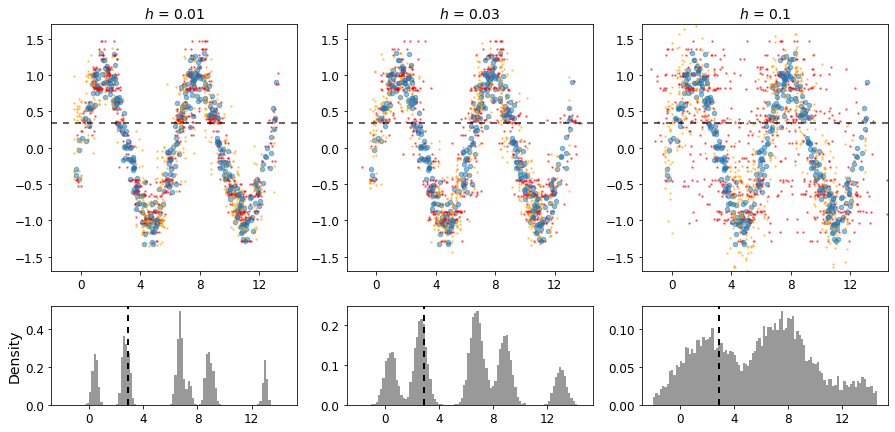

In [16]:
Nss = 10  # nb sub-samples for plotting purposes
rand_key = (0, 1)
while rand_key[1]==1:
    rand_idx = np.random.choice(len(norm_imputed_samples_h1.keys()))
    rand_key = list(norm_imputed_samples_h1.keys())[rand_idx]  # fixed random cell for all histograms
print(f'rand_key = {rand_key} and data is {original_data[rand_key[0]]}')

fig, ax = plt.subplots(2, 3, figsize=(15, 7), gridspec_kw={'height_ratios': [5, 2]})
for i0 in range(3):
    if i0==0:
        temp_sample_dict = norm_imputed_samples_h1
    elif i0==1:
        temp_sample_dict = norm_imputed_samples_h2
    elif i0==2:
        temp_sample_dict = norm_imputed_samples_h3
    
    for i1 in range(original_data.shape[0]):
        if np.isnan(miss_data[i1, 0]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 0)], size=Nss, replace=False)
            m1 = norm_params['min_val'][0]
            m2 = norm_params['max_val'][0]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            y_scatter = [miss_data[i1, 1]] * Nss
            ax[0, i0].scatter(cur_sample, y_scatter, c='red', s=2.0, alpha=0.5)
        elif np.isnan(miss_data[i1, 1]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 1)], size=Nss, replace=False)
            m1 = norm_params['min_val'][1]
            m2 = norm_params['max_val'][1]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            x_scatter = [miss_data[i1, 0]] * Nss
            ax[0, i0].scatter(x_scatter, cur_sample, c='orange', s=2.0, alpha=0.5)
        else:
            x_scatter = miss_data[i1, 0]
            y_scatter = miss_data[i1, 1]
            ax[0, i0].scatter(x_scatter, y_scatter, c='C0', s=20.0, alpha=0.5)
    
    ax[0, i0].axhline(miss_data[rand_key[0], 1], ls=(0, (3, 3)), c='black', lw=2, alpha=0.6)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[0, i0].set_ylim(-1.7, 1.7)
    ax[0, i0].set_title(fr'$h$ = {MY_LIST_HS[i0]}', size=14)
    ax[0, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[0, i0].tick_params(labelsize=12)
    
    if rand_key[1]==0:
        m1 = norm_params['min_val'][0]
        m2 = norm_params['max_val'][0]
    elif rand_key[1]==1:
        m1 = norm_params['min_val'][1]
        m2 = norm_params['max_val'][1]
    
    cur_sample = temp_sample_dict[rand_key] * (m2 + 1e-6) + m1
    ax[1, i0].hist(cur_sample, bins=100, range=[-2.0, 4.0*np.pi+2.0], color='black', alpha=0.4, density=True)
    ax[1, i0].axvline(original_data[rand_key[0], 0], ls=(0, (3, 3)), c='black', lw=2)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[1, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[1, i0].tick_params(labelsize=12)

ax[1, 0].set_ylabel('Density', size=14)
plt.savefig('figures/appA_h.pdf')
plt.show()

### Appendix A.3. Number of samples $N_{\rm draws}$

In [39]:
original_data = load_data('dataset2')
original_data = shuffle(original_data)

miss_data = introduce_missing_data(
    original_data=original_data,
    miss_rate=0.2,
    mode='full_mcar',
    data_name='dataset2',
)

norm_miss_data, norm_params = normalization(miss_data)
norm_original_data, _ = normalization(original_data, parameters=norm_params)

In [40]:
MY_LIST_NBDRAWS = [200, 2000, 20000]

knnxkde_nbdraws1 = KNNxKDE(h=0.03, tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_nbdraws1 = knnxkde_nbdraws1.impute_samples(norm_miss_data, nb_draws=MY_LIST_NBDRAWS[0])

knnxkde_nbdraws2 = KNNxKDE(h=0.03, tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_nbdraws2 = knnxkde_nbdraws2.impute_samples(norm_miss_data, nb_draws=MY_LIST_NBDRAWS[1])

knnxkde_nbdraws3 = KNNxKDE(h=0.03, tau=1.0/300.0, metric='nan_std_eucl')
norm_imputed_samples_nbdraws3 = knnxkde_nbdraws3.impute_samples(norm_miss_data, nb_draws=MY_LIST_NBDRAWS[2])

rand_key = (323, 0) and data is [9.148529   0.06560641]


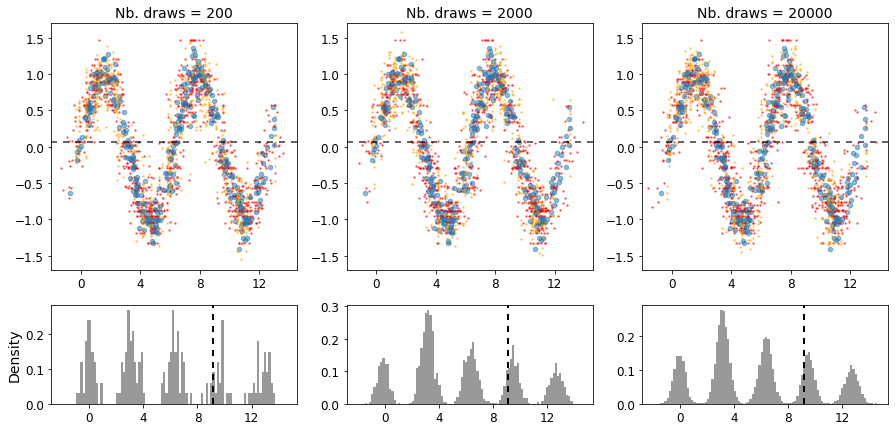

In [41]:
Nss = 10  # nb sub-samples for plotting purposes
rand_key = (0, 1)
while rand_key[1]==1:
    rand_idx = np.random.choice(len(norm_imputed_samples_nbdraws1.keys()))
    rand_key = list(norm_imputed_samples_nbdraws1.keys())[rand_idx]  # fixed random cell for all histograms
print(f'rand_key = {rand_key} and data is {original_data[rand_key[0]]}')

fig, ax = plt.subplots(2, 3, figsize=(15, 7), gridspec_kw={'height_ratios': [5, 2]})
for i0 in range(3):
    if i0==0:
        temp_sample_dict = norm_imputed_samples_nbdraws1
    elif i0==1:
        temp_sample_dict = norm_imputed_samples_nbdraws2
    elif i0==2:
        temp_sample_dict = norm_imputed_samples_nbdraws3
    
    for i1 in range(original_data.shape[0]):
        if np.isnan(miss_data[i1, 0]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 0)], size=Nss, replace=False)
            m1 = norm_params['min_val'][0]
            m2 = norm_params['max_val'][0]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            y_scatter = [miss_data[i1, 1]] * Nss
            ax[0, i0].scatter(cur_sample, y_scatter, c='red', s=2.0, alpha=0.5)
        elif np.isnan(miss_data[i1, 1]):
            cur_sample = np.random.choice(temp_sample_dict[(i1, 1)], size=Nss, replace=False)
            m1 = norm_params['min_val'][1]
            m2 = norm_params['max_val'][1]
            cur_sample = cur_sample * (m2 + 1e-6) + m1
            x_scatter = [miss_data[i1, 0]] * Nss
            ax[0, i0].scatter(x_scatter, cur_sample, c='orange', s=2.0, alpha=0.5)
        else:
            x_scatter = miss_data[i1, 0]
            y_scatter = miss_data[i1, 1]
            ax[0, i0].scatter(x_scatter, y_scatter, c='C0', s=20.0, alpha=0.5)
    
    ax[0, i0].axhline(miss_data[rand_key[0], 1], ls=(0, (3, 3)), c='black', lw=2, alpha=0.6)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[0, i0].set_ylim(-1.7, 1.7)
    ax[0, i0].set_title(fr'Nb. draws = {MY_LIST_NBDRAWS[i0]}', size=14)
    ax[0, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[0, i0].tick_params(labelsize=12)
    
    if rand_key[1]==0:
        m1 = norm_params['min_val'][0]
        m2 = norm_params['max_val'][0]
    elif rand_key[1]==1:
        m1 = norm_params['min_val'][1]
        m2 = norm_params['max_val'][1]
    
    cur_sample = temp_sample_dict[rand_key] * (m2 + 1e-6) + m1
    ax[1, i0].hist(cur_sample, bins=100, range=[-2.0, 4.0*np.pi+2.0], color='black', alpha=0.4, density=True)
    ax[1, i0].axvline(original_data[rand_key[0], 0], ls=(0, (3, 3)), c='black', lw=2)
    ax[0, i0].set_xlim(-2.0, 4.0*np.pi+2.0)
    ax[1, i0].set_xticks([0.0, 4.0, 8.0, 12.0])
    ax[1, i0].tick_params(labelsize=12)

ax[1, 0].set_ylabel('Density', size=14)
plt.savefig('figures/appA_nbdraws.pdf')
plt.show()

## Appendix B -- Presentation of the data sets

Quick and dirty script to generate appendix tables of data sets correlation coeffs

In [16]:
LIST_DATASETS = [
    '2d_linear',
    '2d_sine',
    '2d_ring',
    'geyser',
    'penguin',
    'pollen',
    'planets',
    'abalone',
    'sulfur',
    'gaussians',
    'wine_red',
    'wine_white',
    'japanese_vowels',
    'sylvine',
    'breast',
]

In [28]:
for k in range(len(LIST_DATASETS)):
    data_name = LIST_DATASETS[k]
    print('\\texttt{', end='')
    if '_' in data_name:
        ii = data_name.index('_')
        data_name_temp = data_name[:ii] + '\\' + data_name[ii:]
        print(data_name_temp, end='')
    else:
        print(data_name, end='')
    print('} & ', end='')
    
    original_data = load_data(data_name)
    n, d = original_data.shape
    print(f'{d} & ', end='')
    corr_pearson = np.abs(np.corrcoef(original_data, rowvar=False))
    corr_spearman = np.abs(spearmanr(original_data).correlation)
    list_pearson = []
    list_spearman = []
    if d==2:
        list_pearson.append(corr_pearson[0, 1])
        list_spearman.append(corr_spearman)
    else:
        for i1 in range(1, d):
            for i2 in range(0, i1):
                list_pearson.append(corr_pearson[i1, i2])
                list_spearman.append(corr_spearman[i1, i2])
    
    mu = np.mean(np.abs(np.array(list_pearson)))
    sigma = np.std(np.abs(np.array(list_pearson)))
    print(f'{mu:.3}', end='')
    print(' {\\footnotesize $\pm$ ', end='')
    print(f'{sigma:.3f}', end='')
    print('} & ', end='')
    
    mu = np.abs(np.mean(np.array(list_spearman)))
    sigma = np.abs(np.std(np.array(list_spearman)))
    print(f'{mu:.3f}', end='')
    print(' {\\footnotesize $\pm$ ', end='')
    print(f'{sigma:.3f}', end='')
    print('} & ', end='')

    list_dip_test_pval = []
    for i1 in range(d):
        dip, pval = diptest.diptest(original_data[:, i1])
        list_dip_test_pval.append(pval)
    mu = np.mean(list_dip_test_pval)
    sigma = np.std(list_dip_test_pval)
    print(f'{mu:.3f}', end='')
    print(' {\\footnotesize $\pm$ ', end='')
    print(f'{sigma:.3f}', end='')
    print('} \\\\ \\hline')

\texttt{2d\_linear} & 2 & 0.95 {\footnotesize $\pm$ 0.000} & 0.952 {\footnotesize $\pm$ 0.000} & 0.605 {\footnotesize $\pm$ 0.268} \\ \hline
\texttt{2d\_sine} & 2 & 0.323 {\footnotesize $\pm$ 0.000} & 0.325 {\footnotesize $\pm$ 0.000} & 0.437 {\footnotesize $\pm$ 0.436} \\ \hline
\texttt{2d\_ring} & 2 & 0.0117 {\footnotesize $\pm$ 0.000} & 0.014 {\footnotesize $\pm$ 0.000} & 0.000 {\footnotesize $\pm$ 0.000} \\ \hline
\texttt{geyser} & 2 & 0.901 {\footnotesize $\pm$ 0.000} & 0.778 {\footnotesize $\pm$ 0.000} & 0.001 {\footnotesize $\pm$ 0.001} \\ \hline
\texttt{penguin} & 4 & 0.569 {\footnotesize $\pm$ 0.192} & 0.546 {\footnotesize $\pm$ 0.193} & 0.226 {\footnotesize $\pm$ 0.259} \\ \hline
\texttt{pollen} & 5 & 0.297 {\footnotesize $\pm$ 0.240} & 0.287 {\footnotesize $\pm$ 0.236} & 0.953 {\footnotesize $\pm$ 0.066} \\ \hline
\texttt{planets} & 6 & 0.501 {\footnotesize $\pm$ 0.200} & 0.534 {\footnotesize $\pm$ 0.186} & 0.390 {\footnotesize $\pm$ 0.438} \\ \hline
\texttt{abalone} & 7 & 0

In [29]:
for k in range(len(LIST_DATASETS)):
    data_name = LIST_DATASETS[k]
    original_data = load_data(data_name)
    N, D = original_data.shape
    norm_original_data, _ = normalization(original_data)
    list_dip_stat = []
    list_dip_pval = []
    for d in range(D):
        dip, pval = diptest.diptest(original_data[:, d])
        list_dip_stat.append(dip)
        list_dip_pval.append(pval)
    mu = np.mean(list_dip_pval)
    sigma = np.std(list_dip_pval)
    mini = np.min(list_dip_pval)
    maxi = np.max(list_dip_pval)
    print(data_name)
    print(f'{mu:.3f} +/- {sigma:.3f} range = [{mini:.3f} ; {maxi:.3f}]')
    mu = np.mean(list_dip_stat)
    sigma = np.std(list_dip_stat)
    mini = np.min(list_dip_stat)
    maxi = np.max(list_dip_stat)
    print(f'{mu:.3f} +/- {sigma:.3f} range = [{mini:.3f} ; {maxi:.3f}]')

2d_linear
0.605 +/- 0.268 range = [0.337 ; 0.872]
0.016 +/- 0.003 range = [0.013 ; 0.018]
2d_sine
0.437 +/- 0.436 range = [0.001 ; 0.872]
0.023 +/- 0.010 range = [0.013 ; 0.033]
2d_ring
0.000 +/- 0.000 range = [0.000 ; 0.001]
0.037 +/- 0.004 range = [0.033 ; 0.041]
geyser
0.001 +/- 0.001 range = [0.000 ; 0.002]
0.067 +/- 0.025 range = [0.041 ; 0.092]
penguin
0.226 +/- 0.259 range = [0.002 ; 0.665]
0.027 +/- 0.007 range = [0.018 ; 0.037]
pollen
0.953 +/- 0.066 range = [0.826 ; 1.000]
0.004 +/- 0.001 range = [0.003 ; 0.005]
planets
0.390 +/- 0.438 range = [0.000 ; 0.994]
0.024 +/- 0.017 range = [0.009 ; 0.059]
abalone
0.337 +/- 0.398 range = [0.000 ; 0.966]
0.011 +/- 0.007 range = [0.004 ; 0.026]
sulfur
0.303 +/- 0.435 range = [0.000 ; 0.994]
0.028 +/- 0.022 range = [0.002 ; 0.059]
gaussians
0.125 +/- 0.331 range = [0.000 ; 1.000]
0.047 +/- 0.046 range = [0.002 ; 0.152]
wine_red
0.022 +/- 0.047 range = [0.000 ; 0.143]
0.023 +/- 0.009 range = [0.012 ; 0.041]
wine_white
0.010 +/- 0.024 ran

# Appendix E -- Experimental computation time

We fix `MISSING_SCENARIO = 'full_mcar'` and `MISS_RATE = 0.2`   
Then we repeat `NB_REPEAT=3` times every imputation method and store the compute time  
Note that the $k$NN$\times$KDE, the $k$NN-Imputer, MissForest, SoftImpute, and GAIN run 7 times become they have hyper-parameters.

In [2]:
LIST_DATASETS = [
    '2d_linear',
    '2d_sine',
    '2d_ring',
    'geyser',
    'penguin',
    'pollen',
    'planets',
    'abalone',
    'sulfur',
    'gaussians',
    'wine_red',
    'wine_white',
    'japanese_vowels',
    'sylvine',
    'breast',
]

LIST_METHODS_RMSE = [
    'knnxkde',
    'knnimputer',
    'missforest',
    'softimpute',
    'gain',
    'mice',
    'mean',
    'median',
]

In [16]:
for k in range(len(LIST_DATASETS)):
    data_name = LIST_DATASETS[k]
    original_data = load_data(data_name)
    n, d = original_data.shape
    
    print('\\texttt{', end='')
    if '_' in data_name:
        ii = data_name.index('_')
        data_name_temp = data_name[:ii] + '\\' + data_name[ii:]
        print(data_name_temp, end='')
    else:
        print(data_name, end='')
    print('} ', end='')
    print(f'& ({n}, {d}) ', end='')
    
    array_t = np.zeros((len(LIST_METHODS_RMSE), 3))
    for n in range(3):
        path_name = f'output/full_mcar/_time/time_{data_name}_repeat{n}.npy'
        array_t[:, n] = np.load(path_name)[1:]
    
    mu = np.mean(array_t, axis=1)
    sigma = np.std(array_t, axis=1)
    for n in range(len(LIST_METHODS_RMSE)):
        if n>=4:
            continue
        print(f'& {mu[n]:.3f}', end='')
        print(' {\\footnotesize $\pm$ ', end='')
        print(f'{sigma[n]:.3f}', end='')
        print('} ', end='')
    print('\\\\ \\hline')

\texttt{2d\_linear} & (500, 2) & 0.281 {\footnotesize $\pm$ 0.015} & 0.026 {\footnotesize $\pm$ 0.001} & 0.334 {\footnotesize $\pm$ 0.026} & 0.744 {\footnotesize $\pm$ 0.007} \\ \hline
\texttt{2d\_sine} & (500, 2) & 0.267 {\footnotesize $\pm$ 0.013} & 0.026 {\footnotesize $\pm$ 0.001} & 1.161 {\footnotesize $\pm$ 0.003} & 0.733 {\footnotesize $\pm$ 0.005} \\ \hline
\texttt{2d\_ring} & (500, 2) & 0.327 {\footnotesize $\pm$ 0.043} & 0.027 {\footnotesize $\pm$ 0.000} & 1.172 {\footnotesize $\pm$ 0.034} & 0.765 {\footnotesize $\pm$ 0.015} \\ \hline
\texttt{geyser} & (272, 2) & 0.153 {\footnotesize $\pm$ 0.006} & 0.014 {\footnotesize $\pm$ 0.000} & 0.238 {\footnotesize $\pm$ 0.029} & 0.667 {\footnotesize $\pm$ 0.008} \\ \hline
\texttt{penguin} & (342, 4) & 0.417 {\footnotesize $\pm$ 0.013} & 0.029 {\footnotesize $\pm$ 0.000} & 2.153 {\footnotesize $\pm$ 0.245} & 0.924 {\footnotesize $\pm$ 0.036} \\ \hline
\texttt{pollen} & (3848, 5) & 7.843 {\footnotesize $\pm$ 0.115} & 3.056 {\footnotesize

In [7]:
temp = np.load(path_name)

In [8]:
temp

array([7.40695000e-03, 2.80126095e-01, 2.65588760e-02, 3.68440151e-01,
       7.46335983e-01, 1.30875368e+01, 4.94527817e-03, 4.87804413e-04,
       8.25881958e-04])